In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import time
import random
import os

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Dense, Flatten, Reshape, Input, concatenate,
                                      Conv2D, Conv2DTranspose, Activation,
                                      MaxPooling2D, BatchNormalization, UpSampling2D)
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_card = pd.read_csv('/content/drive/MyDrive/UAI/Data_CSV/creditcard.csv')
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Удаляем столбец Time
card = df_card.drop(['Time'], axis=1)

In [14]:
# Нормализуем сумму транзакций
card.Amount = StandardScaler().fit_transform(card['Amount'].values.reshape(-1, 1))

In [15]:
# Записываем нормальные и мошеннические операции
frauds = card[card.Class == 1]
normal = card[card.Class == 0]

In [16]:
# Выводим размеры по операциям
frauds.shape, normal.shape

((492, 30), (284315, 30))

In [17]:
# Создаем train, test из нормальных операций
X_train, X_test = train_test_split(normal, test_size=0.2, random_state=17)

In [18]:
# Из обучающего набора удаляем Class
X_train = X_train.drop(['Class'], axis=1)

In [19]:
# В X_test добавляем мошеннические операции
X_test = pd.concat([X_test, frauds])

In [20]:
# # Создаем y_test с метками Class
y_test = X_test.Class

In [21]:
# Удаляем Class в X_test
X_test = X_test.drop(['Class'], axis=1)

In [22]:
# Данные в массивы numpy
X_train = X_train.values
X_test = X_test.values

In [23]:
# Выводим размеры
X_train.shape, X_test.shape

((227452, 29), (57355, 29))

Создаем Автоэнкодер

In [91]:
input = Input(shape=(X_train.shape[1]))

x = Dense(16, activation='relu')(input)
x = Dense(32, activation='relu')(x)

#x = Dense(1, activation='linear')(x)

x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

x = Dense(X_train.shape[1], activation='linear')(x)

In [92]:
autoencoder = Model(input, x)

In [93]:
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='mse')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
history = autoencoder.fit(X_train, X_train, epochs=30, batch_size=32)

Epoch 1/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7246
Epoch 2/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.4081
Epoch 3/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.3128
Epoch 4/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2653
Epoch 5/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2471
Epoch 6/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2397
Epoch 7/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2354
Epoch 8/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2324
Epoch 9/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2304
Epoch 10/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2288
Epoch 11/30
7108/7108 [==============================] - 11s 2ms/step - loss: 0.2276
Epoch 12/30
7108/7108 [==============================] - 11s 2ms/step - lo

In [95]:
# Минимальная ошибка
print(f'\nМинимальная ошибка на обучающей выборе: {min(history.history["loss"])}')


Минимальная ошибка на обучающей выборе: 0.22137868404388428


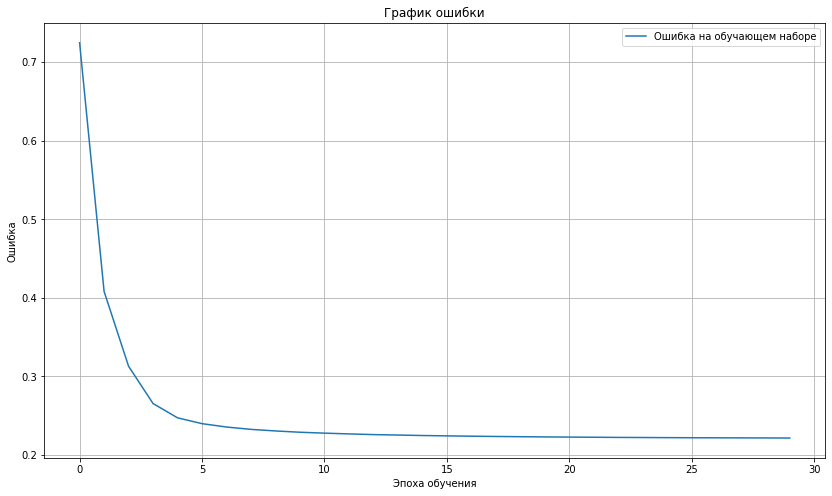

In [96]:
# Выводим графики ошибки
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
#plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.title('График ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

In [97]:
autoencoder.save_weights('/content/drive/MyDrive/UAI/autoencoder_card.h5') # Сохраняем модель
autoencoder.load_weights('/content/drive/MyDrive/UAI/autoencoder_card.h5') # Загружаем модель

In [98]:
# Предсказание по X_tect
prediction = autoencoder.predict(X_test) # делаем предсказание по X_test

In [99]:
# Cреднеквадратичная ошибка по X_test и предсказанием по X_test
mse = np.mean(np.power(X_test - prediction, 2), axis=1)

In [100]:
# Определяем среднеквадратичные ошибки
normal_mse = mse[y_test.values == 0]
frauds_mse = mse[y_test.values == 1]

In [101]:
# Выводим ошибки по тразакциям
print(f'Минимальная ошибка нормальных транзакций: {min(normal_mse)}')
print(f'Максимальная ошибка нормальных транзакций: {max(normal_mse)}')
print(f'Средняя ошибка нормальных транзакций: {np.mean(normal_mse)}')
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ')
print(f'Минимальная ошибка мошеннических транзакций: {min(frauds_mse)}')
print(f'Максимальная ошибка мошеннических транзакций: {max(frauds_mse)}')
print(f'Средняя ошибка мошеннических транзакций: {np.mean(frauds_mse)}')

Минимальная ошибка нормальных транзакций: 0.008983521541784396
Максимальная ошибка нормальных транзакций: 322.8732810665504
Средняя ошибка нормальных транзакций: 0.2241704976507234
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Минимальная ошибка мошеннических транзакций: 0.0578645869254279
Максимальная ошибка мошеннических транзакций: 111.12785212227028
Средняя ошибка мошеннических транзакций: 18.6404848857292


In [274]:
# Выводим транзакции по порогу. Меньше bias-> нормальная. Больше bias-> мошеническая
# РАСПРЕДЕЛЕННЫЙ
bias = 0.4
  
normal_transactions = normal_mse < bias
frauds_transactions = frauds_mse > bias

normal_transactions_percent = (sum(normal_transactions) / len(normal_transactions)) * 100 # вычисляем процент нормальных операций
frauds_transactions_percent = (sum(frauds_transactions) / len(frauds_transactions)) * 100 # вычисляем процент мошеннических операций

print(f'Распознано нормальных транзакций: {normal_transactions_percent}', "%")
print(f'Распознано мошеннических транзакций: {frauds_transactions_percent}', "%")
print(f'Средняя точность распознавания: {(normal_transactions_percent + frauds_transactions_percent) * 0.5}', "%")

Распознано нормальных транзакций: 91.34410776779276 %
Распознано мошеннических транзакций: 91.05691056910568 %
Средняя точность распознавания: 91.20050916844923 %


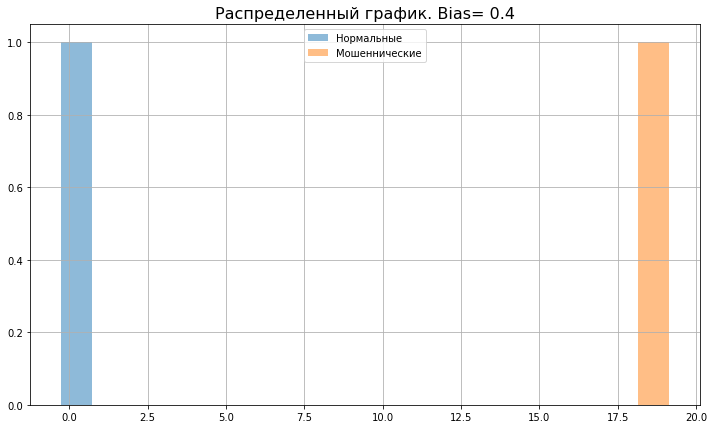

In [156]:
# График MSE распределенный
bins = 1

plt.figure(figsize=(12, 7))
plt.hist(np.mean(normal_mse), bins=bins, alpha=0.5, label='Нормальные')
plt.hist(np.mean(frauds_mse), bins=bins, alpha=0.5, label='Мошеннические')
plt.legend(loc='upper center')
plt.title('Распределенный график. Bias= 0.4', fontsize=16)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


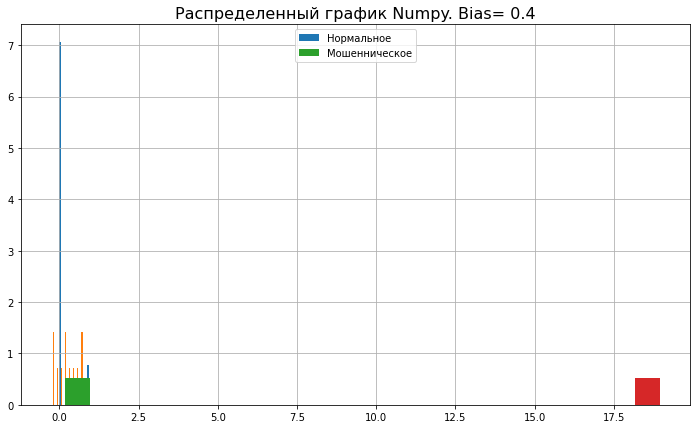

In [230]:
# График numpy MSE распределенный
a = np.histogram(np.mean(normal_mse))
b = np.histogram(np.mean(frauds_mse))

plt.figure(figsize=(12, 7))
plt.hist(a, density=True, label='Нормальное')
plt.hist(b, density=True, label='Мошенническое')
plt.legend(loc='upper center')
plt.title('Распределенный график Numpy. Bias= 0.4', fontsize=16)
plt.grid()

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


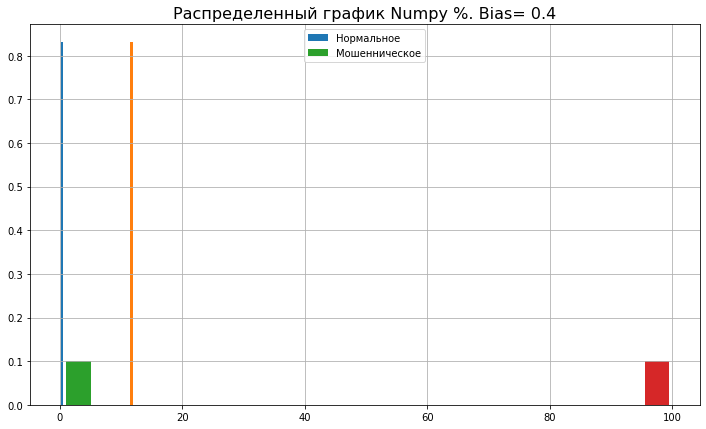

In [232]:
# График numpy % распределенный
a = np.histogram(np.mean(normal_transactions_percent))
b = np.histogram(np.mean(frauds_transactions_percent))

plt.figure(figsize=(12, 7))
plt.hist(a, density=True, label='Нормальное')
plt.hist(b, density=True, label='Мошенническое')
plt.legend(loc='upper center')
plt.title('Распределенный график Numpy %. Bias= 0.4', fontsize=16)
plt.grid()

plt.show()

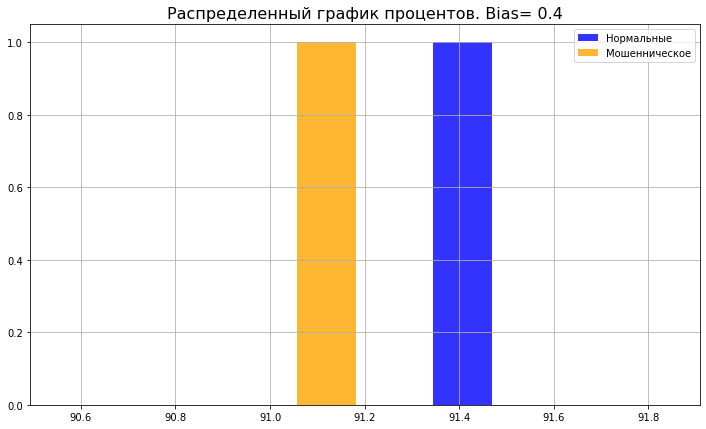

In [166]:
# График прцентов распознанияю Распределенный.
bins = 8

plt.figure(figsize=(12, 7))
plt.hist(normal_transactions_percent, bins=bins, color='blue', alpha=0.8, label='Нормальные')
plt.hist(frauds_transactions_percent, bins=bins, color='orange', alpha=0.8, label='Мошенническое')
plt.legend(loc='upper right')
plt.title('Распределенный график процентов. Bias= 0.4', fontsize=16)
plt.grid()
plt.show()

In [220]:
# Распознавание 100% Мошеннических транзакций
bias = 0.055
  
normal_transactions2 = normal_mse < bias
frauds_transactions2 = frauds_mse > bias

normal_transactions_percent2 = (sum(normal_transactions2) / len(normal_transactions2)) * 100 # вычисляем процент нормальных операций
frauds_transactions_percent2 = (sum(frauds_transactions2) / len(frauds_transactions2)) * 100 # вычисляем процент мошеннических операций

print(f'Распознано нормальных транзакций: {normal_transactions_percent2}', "%")
print(f'Распознано мошеннических транзакций: {frauds_transactions_percent2}', "%")
print(f'Средняя точность распознавания: {(normal_transactions_percent2 + frauds_transactions_percent2) * 0.5}', "%")

Распознано нормальных транзакций: 11.543534460017938 %
Распознано мошеннических транзакций: 100.0 %
Средняя точность распознавания: 55.77176723000897 %


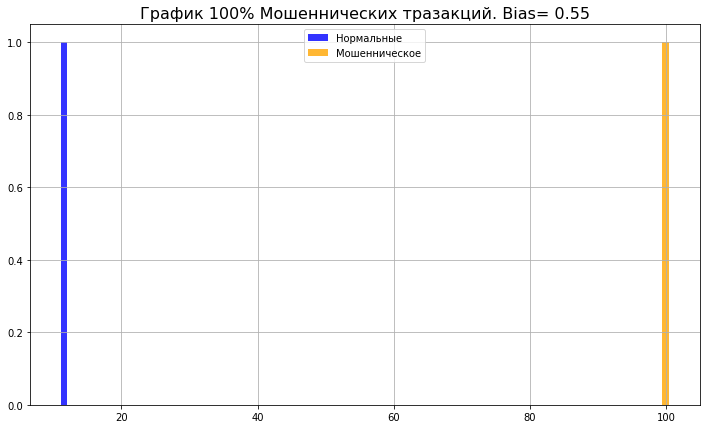

In [228]:
# График процентов распознавания. 100% Мошеннических тразакций.
bins = 1

plt.figure(figsize=(12, 7))
plt.hist(normal_transactions_percent2, bins=bins, color='blue', alpha=0.8, label='Нормальные')
plt.hist(frauds_transactions_percent2, bins=bins, color='orange', alpha=0.8, label='Мошенническое')
plt.legend(loc='upper center')
plt.title('График 100% Мошеннических тразакций. Bias= 0.55', fontsize=16)
plt.grid()
plt.show()

In [271]:
# Распознавание 100% Нормальных транзакций
bias = (max(frauds_mse) * 3) # 323
  
normal_transactions3 = normal_mse < bias
frauds_transactions3 = frauds_mse > bias

normal_transactions_percent3 = (sum(normal_transactions3) / len(normal_transactions3)) * 100 # вычисляем процент нормальных операций
frauds_transactions_percent3 = (sum(frauds_transactions3) / len(frauds_transactions3)) * 100 # вычисляем процент мошеннических операций

print(f'Распознано нормальных транзакций: {normal_transactions_percent3}', "%")
print(f'Распознано мошеннических транзакций: {frauds_transactions_percent3}', "%")
print(f'Средняя точность распознавания: {(normal_transactions_percent3 + frauds_transactions_percent3) * 0.5}', "%")

Распознано нормальных транзакций: 100.0 %
Распознано мошеннических транзакций: 0.0 %
Средняя точность распознавания: 50.0 %


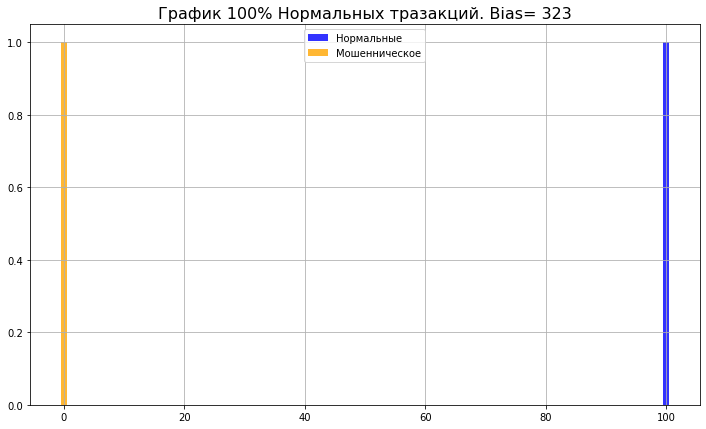

In [272]:
# График процентов распознавания. 100% Нормальных тразакций.
bins = 1

plt.figure(figsize=(12, 7))
plt.hist(normal_transactions_percent3, bins=bins, color='blue', alpha=0.8, label='Нормальные')
plt.hist(frauds_transactions_percent3, bins=bins, color='orange', alpha=0.8, label='Мошенническое')
plt.legend(loc='upper center')
plt.title('График 100% Нормальных тразакций. Bias= 323', fontsize=16)
plt.grid()
plt.show()